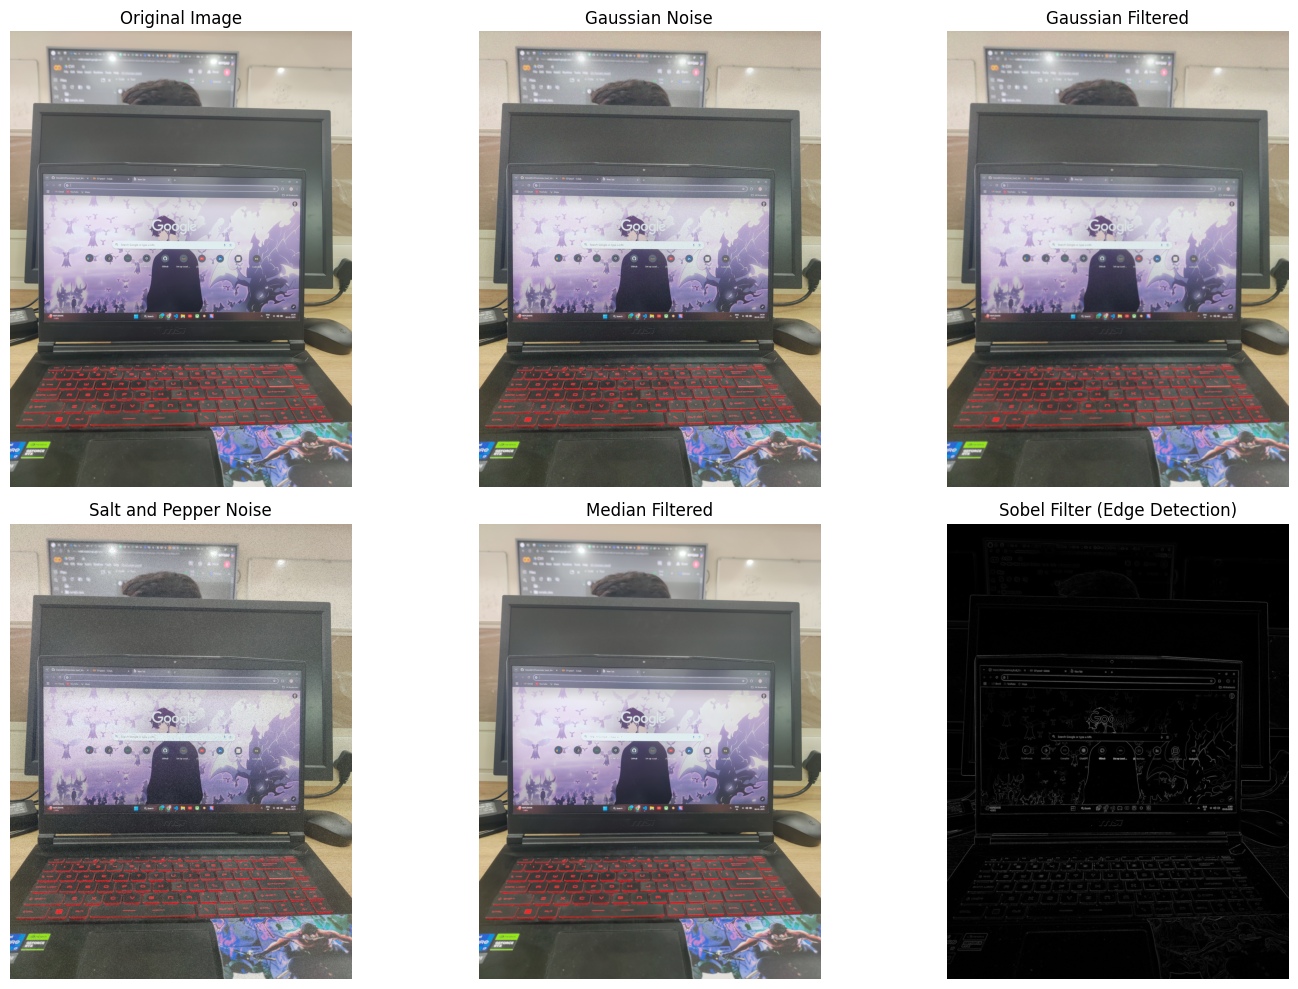

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_noise(image, noise_type="gaussian"):
    if noise_type == "gaussian":
        mean = 0
        std_dev = 25
        gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
        noisy_image = cv2.add(image.astype(np.float32), gaussian_noise)
        return np.clip(noisy_image, 0, 255).astype(np.uint8)

    elif noise_type == "salt_and_pepper":
        noisy_image = image.copy()
        prob = 0.02
        # Salt noise
        num_salt = int(prob * image.size * 0.5)
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
        noisy_image[coords[0], coords[1], :] = 255

        # Pepper noise
        num_pepper = int(prob * image.size * 0.5)
        coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
        noisy_image[coords[0], coords[1], :] = 0
        return noisy_image
    else:
        raise ValueError(f"Unsupported noise type: {noise_type}")


def load_image(image_path="Laptop.jpg"):
    """
    Loads an image in color mode. Change the path to load your desired image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Image not found at {image_path}. Please check the file path.")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper color display in matplotlib
    return image


def apply_filters(image):
    """
    Apply noise, filters, and display results for colored images.
    """
    # Add noise
    gaussian_noisy_image = add_noise(image, noise_type="gaussian")
    sp_noisy_image = add_noise(image, noise_type="salt_and_pepper")

    # Apply Gaussian filter
    gaussian_filtered = cv2.GaussianBlur(gaussian_noisy_image, (15, 15), 0)

    # Convert to grayscale for edge detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Apply Median filter
    median_filtered = cv2.medianBlur(sp_noisy_image, 5)

    # Plot the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("Gaussian Noise")
    plt.imshow(gaussian_noisy_image)
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("Gaussian Filtered")
    plt.imshow(gaussian_filtered)
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.title("Salt and Pepper Noise")
    plt.imshow(sp_noisy_image)
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.title("Median Filtered")
    plt.imshow(median_filtered)
    plt.axis("off")

    plt.subplot(2, 3, 6)
    plt.title("Sobel Filter (Edge Detection)")
    plt.imshow(sobel_combined, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Specify your image path or use a placeholder image
    image = load_image("Laptop.jpg")
    if image is not None:
        apply_filters(image)
    else:
        print("Failed to load image. Please check the file path.")


In [ ]:
c